## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

In [3]:
# reading the datasets

train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')

In [4]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [5]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
# columns in Testing Data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# lets check the head of the test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
# lets also check the tail of the test data
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [10]:
# lets also check the tail of the test data
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [11]:
# values in Departments

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [12]:
# values in Region

train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

## Descriptive Statistics



In [19]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


C:\Users\Devereaux\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


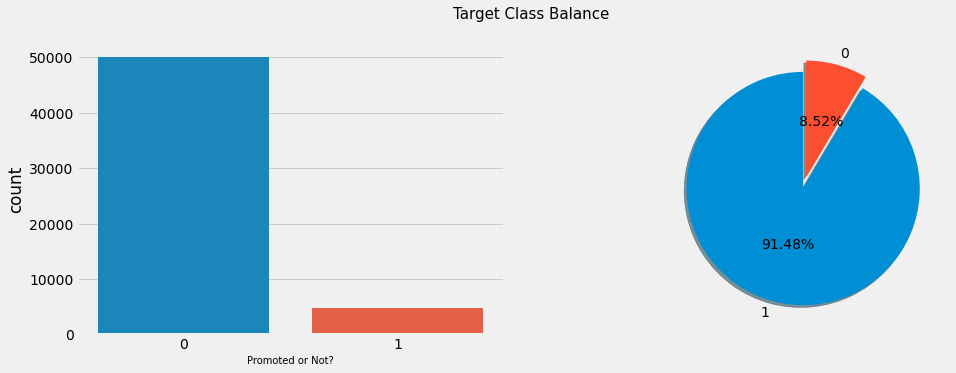

In [15]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [18]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.00,0.0,0.00
age,0,0.00,0.0,0.00
avg_training_score,0,0.00,0.0,0.00
awards_won?,0,0.00,0.0,0.00
department,0,0.00,0.0,0.00
education,2409,4.40,1034.0,4.40
employee_id,0,0.00,0.0,0.00
gender,0,0.00,0.0,0.00
is_promoted,0,0.00,NaN,NaN
length_of_service,0,0.00,0.0,0.00


In [20]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [21]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


## Outlier Detection



In [22]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


C:\Users\Devereaux\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Devereaux\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


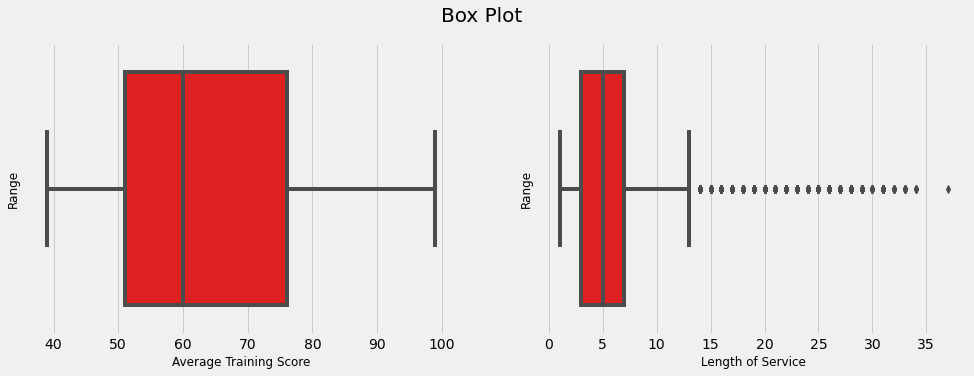

In [23]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [24]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]

## Univariate Analysis



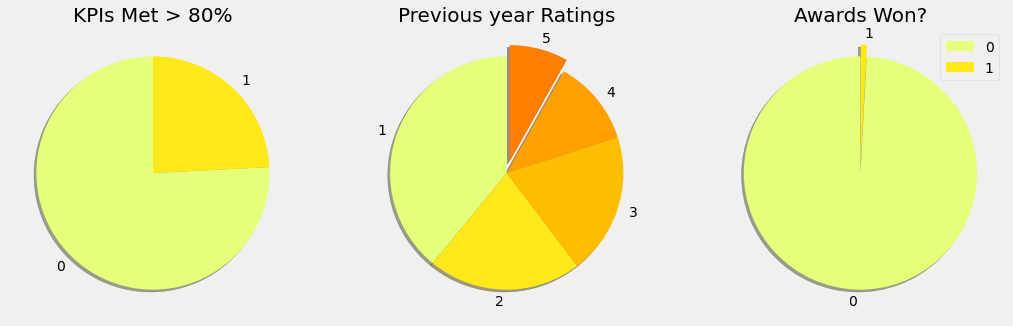

In [25]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

C:\Users\Devereaux\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


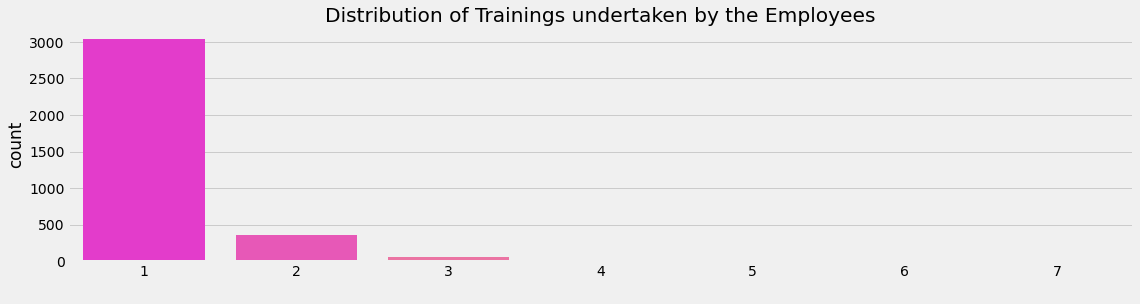

In [26]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

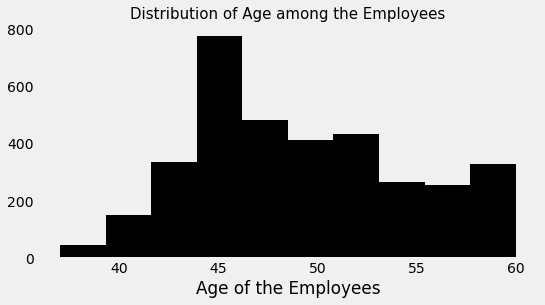

In [27]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

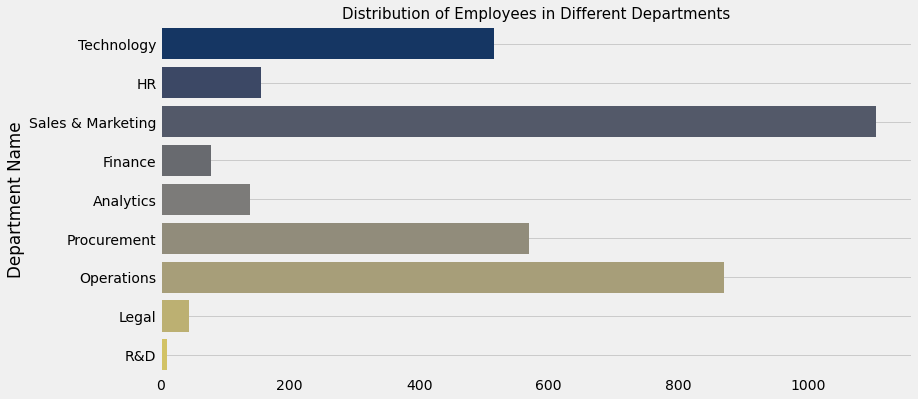

In [28]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

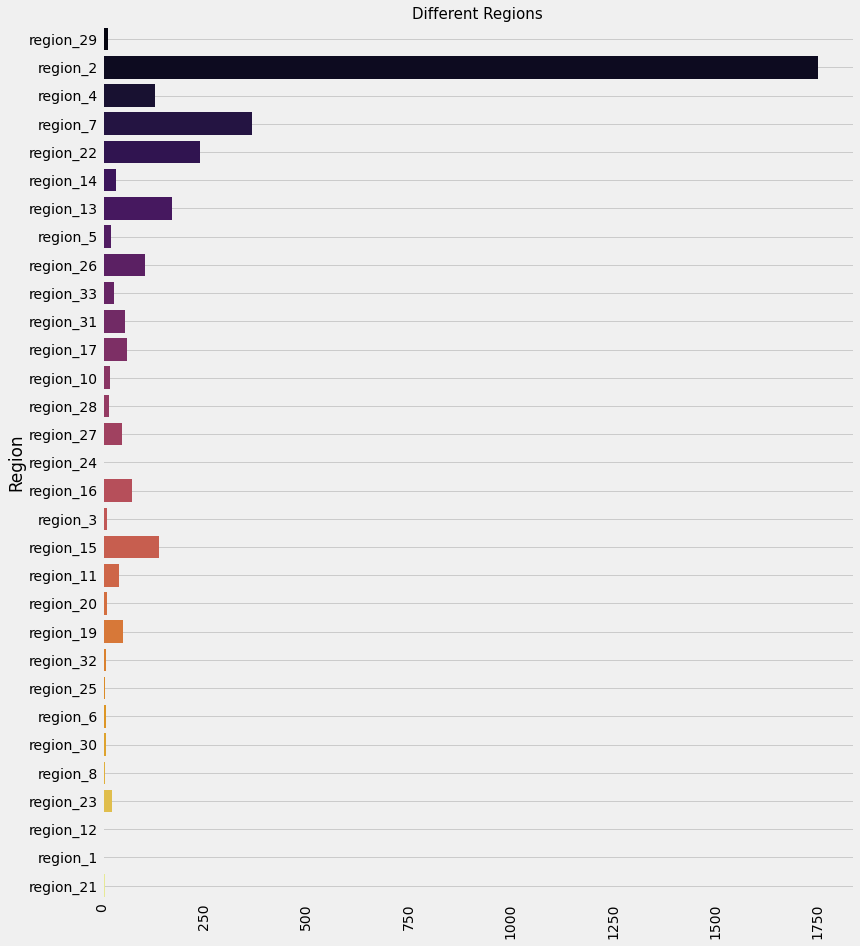

In [29]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

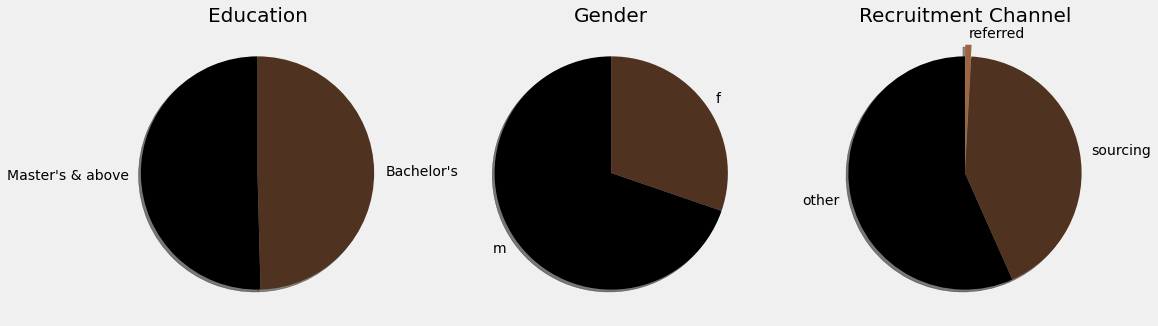

In [43]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0 , 0,0]

plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

## Bivariate Analysis



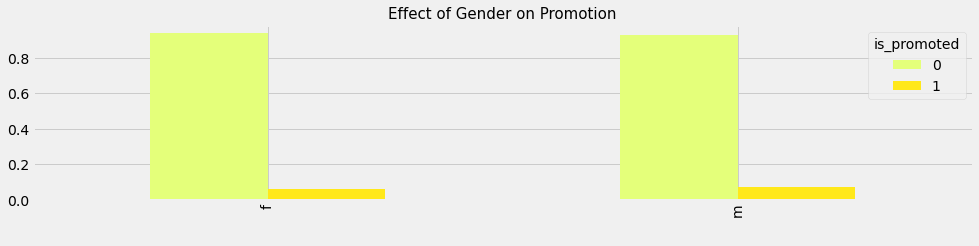

In [50]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color=colors)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

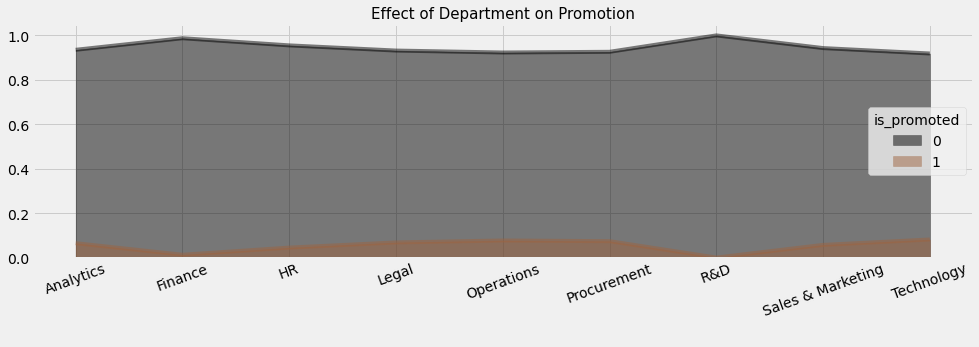

In [49]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

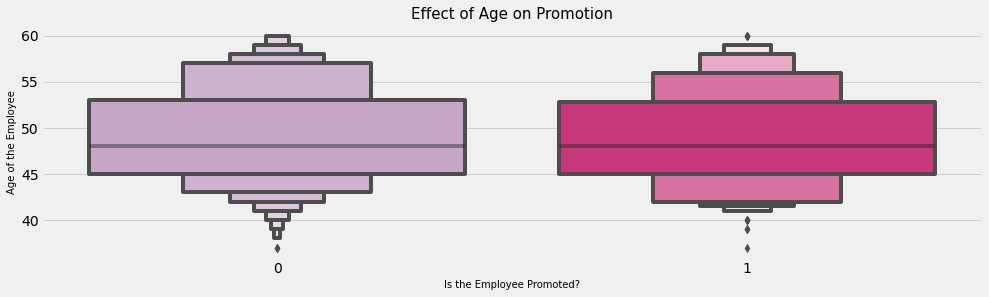

In [51]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

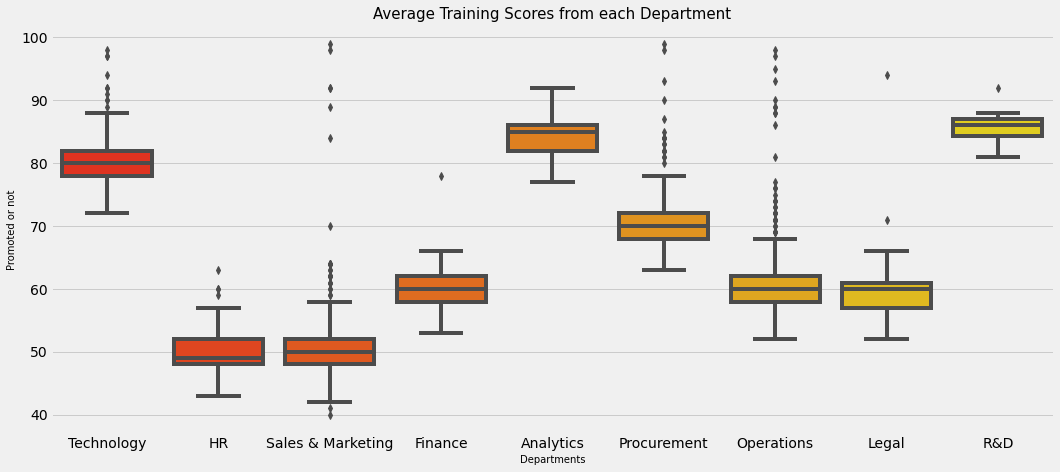

In [52]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis


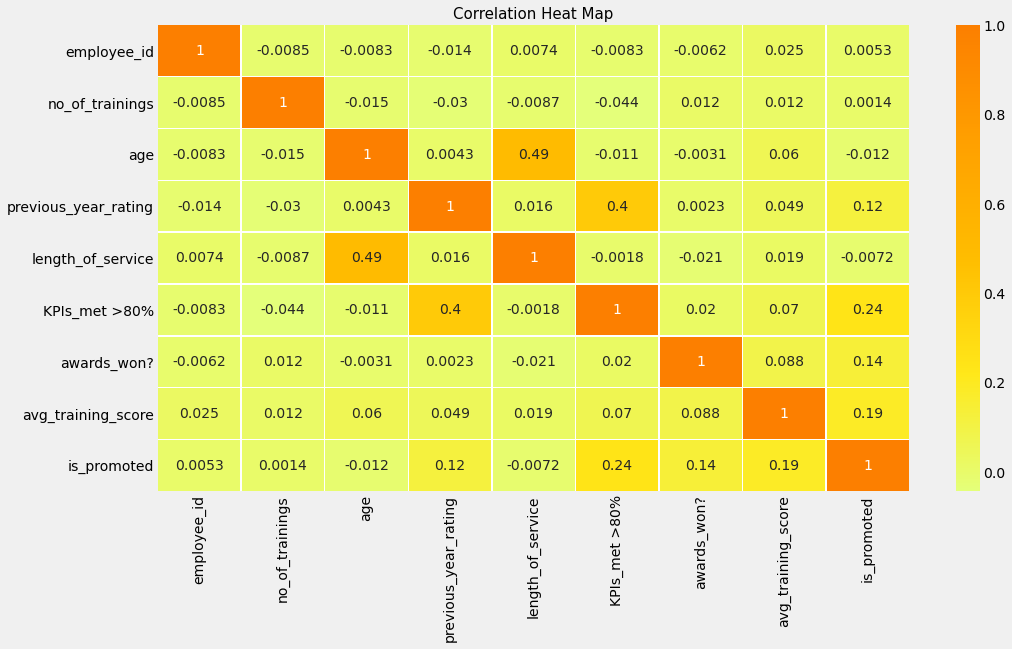

In [53]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

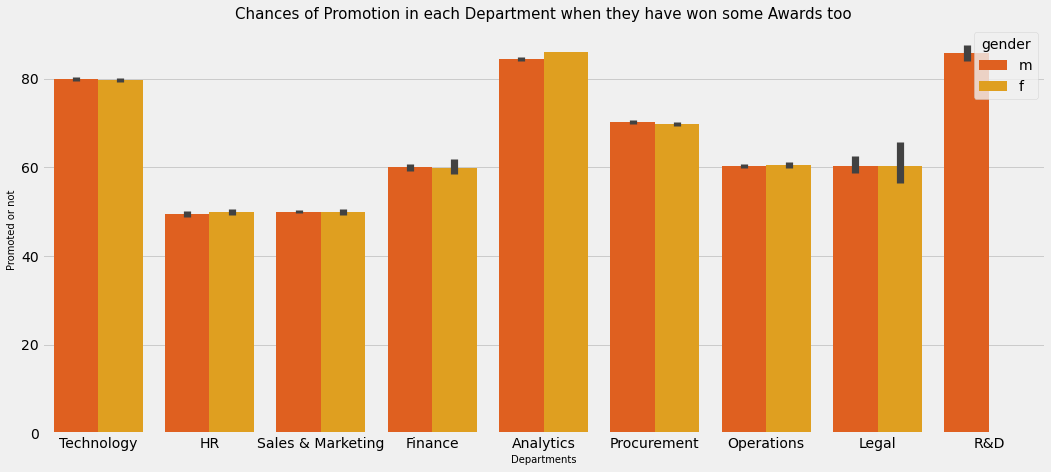

In [54]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Feature Engineering



In [55]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [56]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [57]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


In [58]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3489, 13)
After Deletion of the above two rows : (3489, 13)


In [59]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [60]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [61]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [62]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


In [63]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


In [75]:
from imblearn.over_sampling import SMOTE, ADASYN


In [77]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.


x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [79]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


In [80]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


In [81]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [82]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9994239631336406
Testing Accuracy : 0.956989247311828


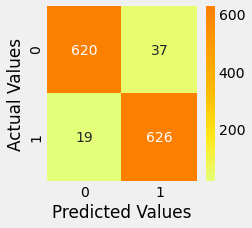

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [84]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       657
           1       0.94      0.97      0.96       645

    accuracy                           0.96      1302
   macro avg       0.96      0.96      0.96      1302
weighted avg       0.96      0.96      0.96      1302



## Real Time Prediction

In [85]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.00000,3489.000000
mean,5.381198,2.504156,0.697334,1.168243,49.145027,3.302379,17.629120,0.241903,0.008598,62.071081,0.067068,3.55288,72.591574
std,2.125439,0.500054,0.459478,0.506902,5.423166,1.230116,3.712584,0.428297,0.092342,12.285130,0.250175,1.45818,35.119410
min,0.000000,2.000000,0.000000,1.000000,37.000000,1.000000,14.000000,0.000000,0.000000,40.000000,0.000000,1.00000,40.000000
25%,4.000000,2.000000,0.000000,1.000000,45.000000,3.000000,15.000000,0.000000,0.000000,51.000000,0.000000,3.00000,52.000000
50%,5.000000,3.000000,1.000000,1.000000,48.000000,3.000000,17.000000,0.000000,0.000000,60.000000,0.000000,3.00000,62.000000
75%,7.000000,3.000000,1.000000,1.000000,53.000000,4.000000,19.000000,0.000000,0.000000,71.000000,0.000000,5.00000,79.000000
max,8.000000,3.000000,1.000000,7.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.00000,469.000000


In [87]:
prediction = model.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


**Here we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.**

**We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model**.


